Import the necessary packages


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data in a DataFrame and show the first 5 rows to inspect the DataFrame.

In [26]:
df = pd.read_csv('customer_booking.csv', encoding="Latin-1") # df inlezen
df.head() # df showen

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


**Information about the dataframe**
  
  
This dataset contains information about airline bookings, including the number of passengers, sales channel, trip type, purchase lead time, length of stay, flight hour, flight day, route, booking origin, and various flags indicating if the customer wanted extra baggage, preferred seat, or in-flight meals. The dataset also includes the total flight duration and a flag indicating if the booking was completed. This information can be used for various analyses, such as predicting demand, identifying popular routes, and understanding customer preferences.

**Column Description**:
* num_passengers = number of passengers travelling
* sales_channel = sales channel booking was made on
* trip_type = trip Type (Round Trip, One Way, Circle Trip)
* purchase_lead = number of days between travel date and booking date
* length_of_stay = number of days spent at destination
* flight_hour = hour of flight departure
* flight_day = day of week of flight departure
* route = origin -> destination flight route
* booking_origin = country from where booking was made
* wants_extra_baggage = if the customer wanted extra baggage in the booking
* wants_preferred_seat = if the customer wanted a preferred seat in the booking
* wants_in_flight_meals = if the customer wanted in-flight meals in the booking
* flight_duration = total duration of flight (in hours)
* booking_complete = flag indicating if the customer completed the booking

Create a new dataframe from this one:
* only containing following columns:  
num_passengers, purchase_lead, length_of_stay, booking_origin, flight_duration and booking_complete
* with only the rows where the booking is completed (1)


In [27]:
new_df = df[["num_passengers","purchase_lead","length_of_stay","booking_origin","flight_duration","booking_complete"]]
new_df = new_df[new_df["booking_complete"] == 1]
new_df

,num_passengers,purchase_lead,length_of_stay,booking_origin,flight_duration,booking_complete
82,1,15,31,Malaysia,8.83,1
86,1,156,19,Malaysia,8.83,1
94,1,181,87,Singapore,8.83,1
109,1,127,17,Malaysia,8.83,1
122,1,42,17,Malaysia,8.83,1
...,...,...,...,...,...,...
49972,1,33,6,Taiwan,4.67,1
49977,2,15,6,Malaysia,4.67,1
49980,4,242,6,Malaysia,5.00,1
49984,2,7,6,Australia,5.62,1


Group the average days between booking date and traveling date per country of the booking. Display the countries with the lowest average of days between booking and traveling first and the ones with the most days last.

In [28]:
new_df.groupby("booking_origin")["purchase_lead"].mean().sort_values(ascending=False)

booking_origin
Runion                 307.000000
Belgium                 299.000000
Switzerland             143.333333
Kazakhstan              130.000000
Bangladesh              122.500000
Norway                  120.000000
Thailand                109.840426
Indonesia               106.894309
Sri Lanka               103.000000
Netherlands             102.500000
Denmark                 100.000000
Iraq                     97.000000
Germany                  92.500000
Qatar                    92.400000
New Zealand              92.333333
Chile                    87.000000
Malaysia                 86.120340
United States            84.154762
South Korea              82.006494
Canada                   82.000000
China                    79.152738
Turkey                   72.000000
Hong Kong                71.575342
Italy                    71.181818
India                    70.847328
Singapore                69.899666
Nepal                    68.333333
Philippines              68.026667
Portu

In [29]:
new_df.groupby("booking_origin")["purchase_lead"].mean()["Australia"]


59.986666666666665

Make a histogram (bar plot) of the purchase leads per country. Do this for the 5 countries with the most bookings. Place the purchase leads on the x-axis and the number of bookings on the y-axis. Use appropriate labels and show a legend.

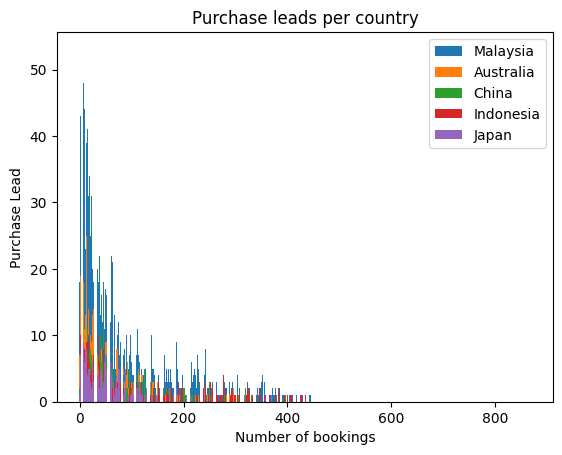

In [32]:
plt.figure()
# EXAMEN --> dataprocessing, object oriented 
# booking_count = new_df.groupby("booking_origin")["purchase_lead"].sum().sort_values(ascending=False)
for country in new_df["booking_origin"].value_counts()[:5].index:
    ddf = (new_df[new_df["booking_origin"] == country]["purchase_lead"].value_counts())
    plt.bar(ddf.index, ddf, label = country)

plt.title("Purchase leads per country")
plt.xlabel("Number of bookings")
plt.ylabel("Purchase Lead")

plt.legend()
plt.show()
# new_df.head()